# Исследование объявлений о продаже квартир

**Описание проекта**

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.
Данные берутся из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Целль проекта**

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net//datasets/real_estate_data.csv', sep='\t')
data

C:\Users\DILYA\anaconda3\envs\practicum\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

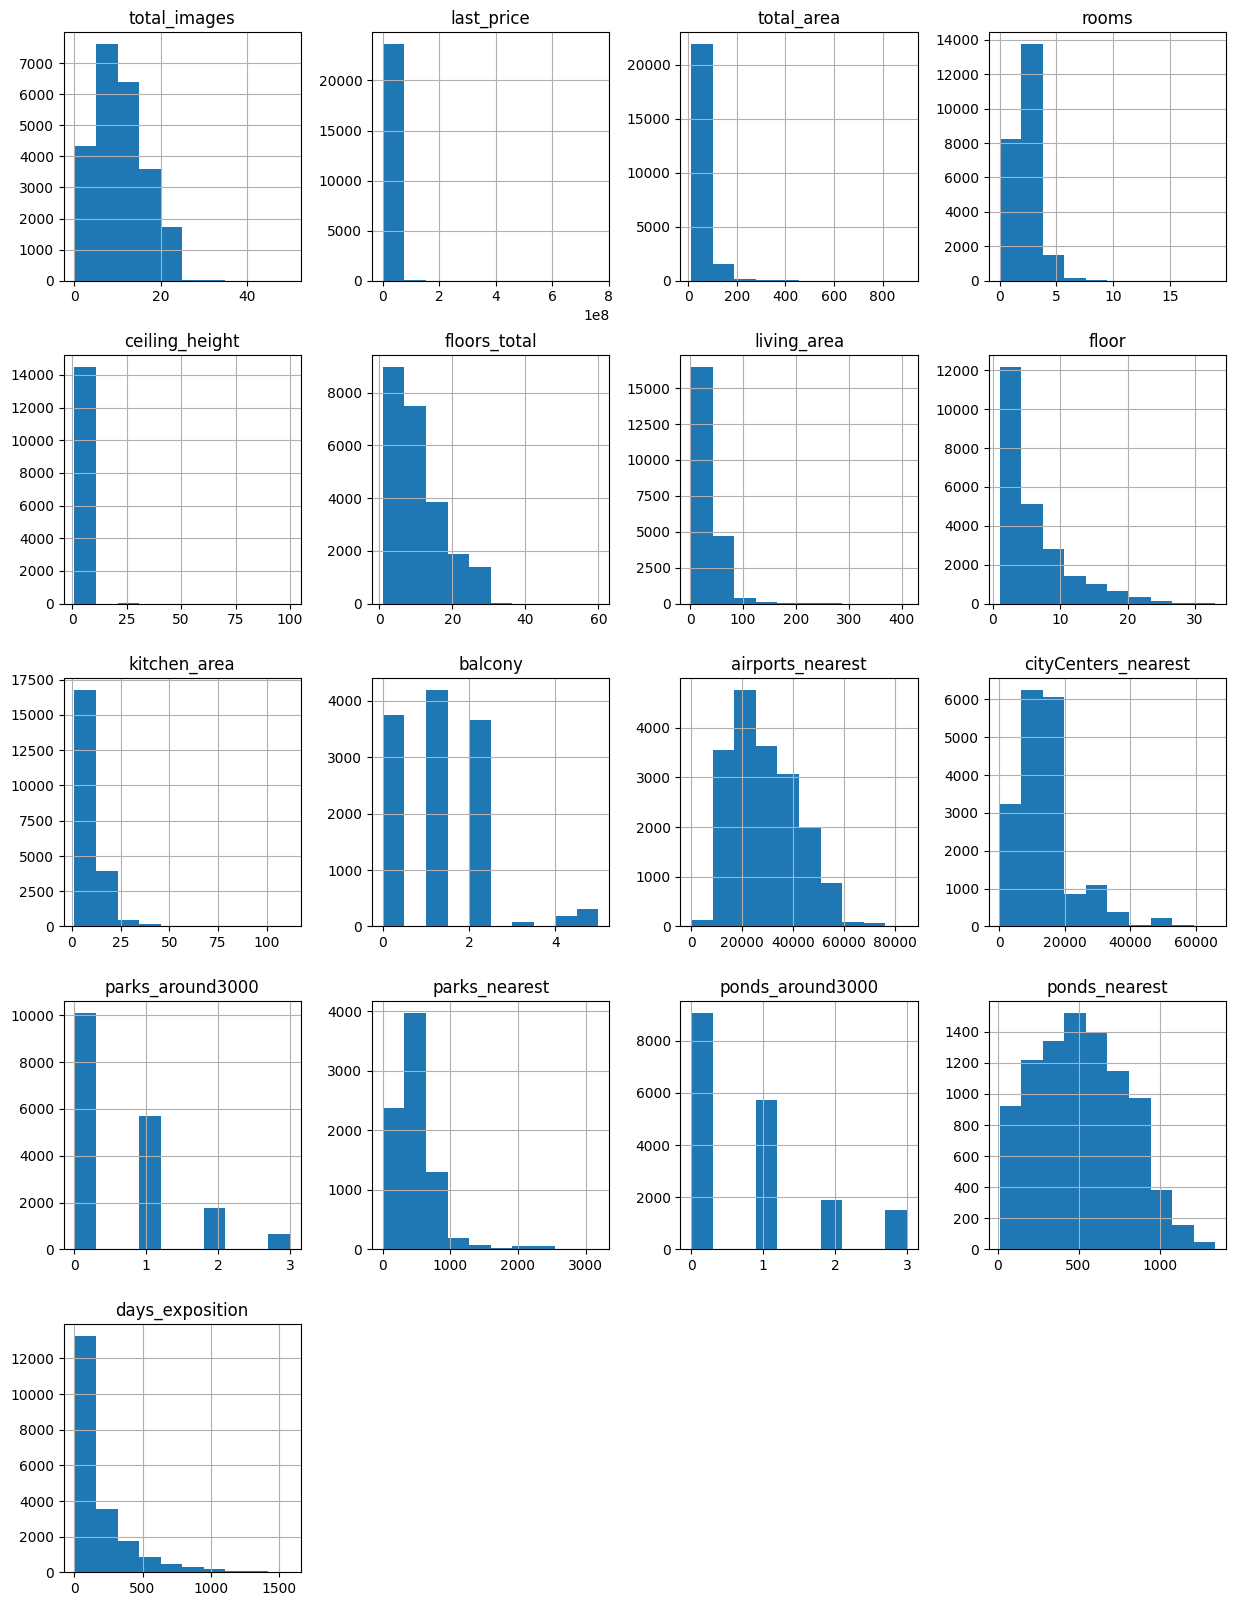

In [2]:
data.hist(figsize=(15, 20))

Выгрузили данные по исследованию недвижимости из файла real_estate_data, дальше переименуем датафрейм в data. Cостоят данные из 22 столбцов и 23699 строк. Так же сделали диаграммы по всем столбцам, чтобы визуально легче было посмотреть что за данные и возможно на первый взгляд определить аномалии в данных.Сразу бросается в глаза высота потолков и они кажутся неправдоподоными (ceiling_height)

### Предобработка данных

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.isna().sum()  #проверяем данные на пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2.1.Работа с пропусками**

Из таблицы data в 14 столбцах есть пропуски.  
Для начала убрали следующие пропуски в столбцах:  
1.balcony - в пустых значениях указали 0 т.к. скорее всего его нет, если бы балкон был, то  такую деталь не забыли.  
2.is_apartment - таким же методом как и с балконами поступили касательно апартаментов, пропуски заменили на False.  
3.floors_total - в случае этажей в доме заполнили на медианое значение. Для этого выявили, что медиана равна 9 и заменили все пропуски на 9. После проверки медиана не поменялась.  
4.kitchen_area - можно заполнить пропуски в случае условия что это студия,то кухни нет, соответственно эти пропуски можно заменить на ноль, после заменим оставшиеся пропуски медианой
5.cityCenters_nearest -  заменим пустые значения на 0 поскольку отсутствие значения может указывать на отсутствие близлежащего центра города. В данном контексте 0 можно рассматривать как индикатор того, что в тех населенных пунктах, где пропущены данные, центра города рядом нет. Это может быть характерно для сел, поселков или деревень, где понятие центра города не столь применимо.  
6.airports_nearest - можно заменить пустые значения в столбце на 0, поскольку присутствие 0 может служить индикатором отсутствия близости к аэропорту.Означает, что в данных населенных пунктах, где значение отсутствует, аэропорта нет в принципе, и они могут быть селами, поселками или деревнями, где не предполагается наличие аэропорта  
7.parks_nearest - аналогичным способом как и выше заменим на 0 поскольку отсутствие значения может указывать на отсутствие близлежащего парка. Можно рассматривать как индикатор того, что в тех населенных пунктах, где пропущены данные, парка рядом нет, что может характеризовать села, поселки или деревни, где парков в принципе не предполагается.   
8.living_area - восстановление пропусков путем среднего коэф-та отношения жилой площади к общей площади

In [5]:
data['balcony'].unique()
data['balcony'] = data['balcony'].fillna(0) # заменили пропуски на ноль в балконах
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [6]:
data['is_apartment'].unique()
data['is_apartment'] = data['is_apartment'].fillna(False) #  т.к не выбрали значение то логично, что скорее всего это не апартаменты
data['is_apartment'].unique()

array([False,  True])

In [7]:
data['floors_total'].unique()
median_before = data['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(median_before)
data['floors_total'].unique() #указали значение медианы в этажах

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [8]:
data.loc[(data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area']=0 
#в случае условия что это студия,то кухни нет, соответственно эти пропуски можно заменить на ноль

In [9]:
data['total_area'].corr(data['kitchen_area']) #слабая связь,лучше не заменять пропуски с использованием коэф-та корреляции

0.6119819188251922

In [10]:
median_kitchen = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(median_kitchen) 
#т.к корреляция была слабая заменим остальные пропуски на кухне медианой

In [11]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0) # заменили пропуски на ноль

In [12]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)# заменили пропуски на ноль

In [13]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)# заменили пропуски на ноль

Рассмотрим пропуски в жилой площади, так как общая и жилая площадь сильно коррелируют можно посчитать отношения жилых площадей к общим, взять средний коэффициент отношения и с его помощью восстановить пропуски, умножив на общую площадь. Заменим таким образом пропуски

In [14]:
mean_ratio_liv_area = data['living_area'].mean() / data['total_area'].mean() #средний коэф-т отношения жилой пл. к общей пл.
data['living_area'].fillna(data['total_area'] * mean_ratio_liv_area, inplace=True) #заменяем пропуски

In [15]:
data.isna().sum() #после заполнение пустых значений проверили какие столбцы все еще остались пустыми

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5518
parks_nearest               0
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

На данном этапе проверили какие столбцы еще остались пустыми, а так же сделали проверку что функция сработала и пропуски заполнились

**2.2.Смена типа данных**

Для дальнейшей работы поменяем тип данных:  
1.first_day_exposition - хранится дата, но  тип object поменяли на тип даты т.к для дальнейшего использования не сможем совершить расчеты.  
2.is_apartment  - в таблице значения True/False, но при этом тип object, это неверно поменяем на данные типа bool.  

In [16]:
data['first_day_exposition'] =  pd.to_datetime(data['first_day_exposition'])
data['is_apartment'].fillna(False).astype('bool')

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

**2.3.Обработка неявных дубликатов**

В locality_name существуют неявные дубликаты связанные с поселками, поменяли ё на е, так же разнообразие обозначений поселков привели просто к 'поселку'. 

'Село' не стали заменять на 'поселок' т.к село считается административным центром, а поселок нет.  


Можно было 'садоводческое некоммерческое товарищество' поменять на  'садовое товарищество', но в данном случае важно что есть коммерческое и некоммерческое товарищество поэтому решено оставить.

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['коттеджный поселок', 'городской поселок', 'поселок городского типа', 'поселок станции','деревня'], 'поселок', regex=True)
    .replace(['поселок Кудрово','Кудрово' ], 'Кудрово', regex=True)
    .replace(['Мурино','поселок Мурино'], 'Мурино', regex=True)
    .replace(['Любань','поселок Любань'], 'Любань', regex=True)
) 

In [19]:
data['locality_name'].unique() #проверили изменение данных

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'поселок Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'поселок Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'поселок Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'поселок Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'поселок Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'поселок Старая',
       'поселок Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'п

**2.4.Обработка и удаление аномалий (редких значений)**

Проверим взаимосвязь по пропущенным данным связанных с площадью: площади кухни с общей площадью,площади кухни с жилой площадью. Так же рассмотрим высоту потолков 

*Обработка аномалии данных в жилой площади*

In [20]:
data['living_area'].describe()

count    23699.000000
mean        34.594076
std         22.354668
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Рассмотрим после заполнения пропусков минимальное значение в  2 кв. Выглядит подозрительно, возможно это аномалия

In [21]:
min_living_area = data.loc[data['living_area'].idxmin()] 
min_living_area

total_images                             20
last_price                        6350000.0
total_area                             52.0
first_day_exposition    2018-02-06 00:00:00
rooms                                     2
ceiling_height                          3.0
floors_total                            6.0
living_area                             2.0
floor                                     2
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                            9.0
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    32453.0
cityCenters_nearest                  6521.0
parks_around3000                        0.0
parks_nearest                           0.0
ponds_around3000                        1.0
ponds_nearest                        1012.0
days_exposition                        91.0
Name: 13915, dtype: object

Получили результаты, что общая площадь составляет 52 кв.м, кухня 9 кв.м, квартира находится ни на первом, ни на последнем этаже, а жилая площадь составляет только 2 кв.м. Соответственно это не продают помещение в подвале,либо на крыше,
значит это человеский фактор и совершили ошибку. Проверим сколько таких строк, где жилая площадь меньше в три раза чем общая площадь


In [22]:
data[data['total_area'] > 3 * data['living_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,0.0,0.0,NaN,155.0
51,7,45000000.0,161.00,2017-10-17,3,3.20,8.0,38.00,4,False,...,50.00,0.0,Санкт-Петербург,32537.0,6589.0,0.0,0.0,3.0,99.0,541.0
101,4,3000000.0,37.00,2019-03-23,1,2.75,10.0,12.00,3,False,...,13.00,0.0,садовое товарищество Новая Ропша,0.0,0.0,NaN,0.0,NaN,NaN,NaN
123,2,4300000.0,48.00,2019-04-04,1,NaN,22.0,14.00,5,False,...,23.80,0.0,Санкт-Петербург,16951.0,15747.0,0.0,0.0,1.0,1097.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1,3000000.0,37.29,2019-04-15,1,NaN,19.0,10.08,10,False,...,16.88,0.0,Санкт-Петербург,37006.0,15157.0,0.0,0.0,0.0,NaN,7.0
23549,5,19600000.0,184.00,2016-04-21,3,3.00,19.0,55.70,19,False,...,24.50,5.0,Санкт-Петербург,18995.0,4837.0,0.0,0.0,0.0,NaN,205.0
23573,8,6290000.0,47.67,2019-03-20,1,3.60,12.0,13.59,12,False,...,17.87,2.0,Санкт-Петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0
23574,14,64990000.0,139.00,2015-11-24,3,3.00,8.0,3.00,8,False,...,16.00,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Получается что в 342 строках общая площадь больше в три раза чем жилая, например в строке 23574, общая площадь 139 кв м, а жилая составляет только 3 кв м. Эти данные точно аномальные принято решение их удалить

In [23]:
condition = data['total_area'] > 3 * data['living_area']
data  = data.drop(data[condition].index) #удаляем данные из таблицы
data['living_area'].describe()

count    23356.000000
mean        34.825174
std         22.378748
min          7.422736
25%         19.000000
50%         30.036765
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Удалили 342 аномальные строки и вызвали фунцкию describe, теперь минимальное значение составляет 8 кв.м в целом такие комнаты бывает, теперь среднее составляет 36,7 кв м, медиана 19 кв м, стандартное отклонение в 25 кв.м

*Проверим аномалии в данных по высоте потолков*

In [24]:
high_ceiling_data = data[data['ceiling_height'] > 3.7] #посмотрим потолки выше 3,7 метров
high_ceiling_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06,3,4.15,3.0,44.2,2,False,...,12.20,0.0,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
179,5,14800000.0,108.7,2019-04-11,3,4.00,5.0,72.4,5,False,...,8.00,0.0,Санкт-Петербург,23017.0,2559.0,1.0,559.0,0.0,NaN,NaN
355,17,3600000.0,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,...,9.01,2.0,Гатчина,0.0,0.0,NaN,0.0,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,False,...,21.10,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
797,1,7500800.0,105.2,2017-09-08,3,3.80,5.0,62.6,2,False,...,19.20,0.0,Санкт-Петербург,24705.0,4924.0,2.0,521.0,0.0,NaN,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,7,91075000.0,491.0,2017-05-27,5,4.20,9.0,274.0,9,False,...,45.00,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
22869,0,15000000.0,25.0,2018-07-25,1,100.00,5.0,14.0,5,True,...,11.00,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22938,14,4000000.0,98.0,2018-03-15,4,27.00,2.0,73.0,2,True,...,9.00,1.0,поселок Нижняя,0.0,0.0,NaN,0.0,NaN,NaN,27.0
22965,19,35000000.0,236.0,2019-03-26,6,4.00,5.0,164.3,2,False,...,16.40,1.0,Санкт-Петербург,31670.0,8748.0,1.0,243.0,1.0,827.0,18.0


Всего 178 строк где потолки выше  3,7 метра.  При этом видем результат в 25 метров в этом случае можно разделить на  10 и получить адекватную высоту потолков в 2,5 метра.Выделим значения которые сможем на 10 разделить

In [25]:
change_ceiling_data = data[data['ceiling_height'] > 20] #посмотрим потолки выше 20 метров
change_ceiling_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,9.01,2.0,Гатчина,0.0,0.0,NaN,0.0,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,8.00,0.0,Волхов,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,9.01,2.0,Мурино,0.0,0.0,NaN,0.0,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.50,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.00,2.0,поселок Мины,0.0,0.0,NaN,0.0,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,0.0,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,5.70,0.0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,5.20,0.0,Санкт-Петербург,11647.0,13581.0,0.0,0.0,0.0,NaN,NaN


В 22 строках совершим обработку данных разделив на 10 


In [26]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10 
data[data['ceiling_height'] > 4 ] #cнова посотрим таблицу где потолки выше 4 метров

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06,3,4.15,3.0,44.200000,2,False,...,12.20,0.0,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.500000,7,False,...,21.10,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.000000,3,False,...,63.00,2.0,Санкт-Петербург,24899.0,4785.0,0.0,0.0,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01,1,5.00,3.0,16.558410,1,False,...,9.01,0.0,Бокситогорск,0.0,0.0,NaN,0.0,NaN,NaN,6.0
1129,20,6695000.0,36.9,2018-09-28,1,4.06,5.0,22.000000,2,False,...,7.20,0.0,Санкт-Петербург,21725.0,2990.0,1.0,596.0,1.0,866.0,110.0
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4.0,162.000000,3,False,...,30.00,0.0,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6.0,227.820886,6,False,...,9.01,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
2639,17,4850000.0,59.7,2017-11-18,3,4.19,5.0,46.300000,4,False,...,6.40,1.0,Санкт-Петербург,42964.0,15468.0,0.0,0.0,0.0,NaN,60.0
2802,7,14950000.0,50.0,2016-03-06,2,4.80,3.0,30.000000,2,False,...,10.00,0.0,Санкт-Петербург,24433.0,1725.0,1.0,589.0,3.0,161.0,160.0
2823,8,2700000.0,39.0,2018-02-01,1,4.50,6.0,18.300000,6,False,...,8.40,0.0,поселок Токсово,0.0,0.0,NaN,0.0,NaN,NaN,NaN


Оставим значения потолков до 4 метров считая что это огут быть элитная недвижимость, остальное удалим

In [27]:
data.drop(data[data['ceiling_height'] > 4].index, inplace=True) #удаляем потолки выше 4 метров

In [28]:
median_before = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median_before) #исключив аномальные данные, заменим пропуски медианой 

*Проверим параметр по этажности домов на аномалии*

In [29]:
data['floors_total'].value_counts() 

5.0     5728
9.0     3815
16.0    1357
12.0    1345
4.0     1181
10.0    1155
25.0    1054
6.0      891
17.0     819
3.0      647
7.0      572
14.0     540
18.0     488
24.0     460
2.0      382
8.0      377
15.0     360
23.0     346
19.0     325
22.0     274
20.0     262
13.0     218
11.0     199
27.0     158
21.0     157
26.0     116
1.0       25
35.0      23
28.0      21
36.0       3
37.0       1
33.0       1
60.0       1
34.0       1
Name: floors_total, dtype: int64

Можно из данных удалить дома выше 37 этажей так являются высокими и там единичные записи

In [30]:
data.drop(data[data['floors_total'] > 36].index, inplace=True) #удалили дома выше 36 этажей

На даном этапе посторались максимально проверить аномальные занчения.

### Посчитайте и добавьте в таблицу новые столбцы

Необходимо добавить дополнительные столбцы:

1.цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);  
2.день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);  
3.месяц публикации объявления;  
4.год публикации объявления;  
5.расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений)
6.тип этажа квартиры (значения — «‎первый», «последний», «другой»).

In [31]:
#Столбцы с 1-5 пропишем в одном коде:
#3.1.Цена одного квадратного метра
data['price_for_sq_metre'] =  (data['last_price'] / data['total_area']).round(2)

#3.2. День недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday.sort_values(ascending=True)

#3.3.Месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month.sort_values(ascending=True)

#3.4.Год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year.sort_values(ascending=True)

#3.5.Расстояние до центра города в километрах.
#Перевели данные из м в км и округлили до ближайших целых значений
data['cityCenters_nearest'] = (data['cityCenters_nearest'] /1000).astype(int)

**3.6.Тип этажа квартиры.**  
Добавили столбец со следующими значениями для первого этажа — «первый», для последнего «последний» и «другой».

In [32]:
#создаем формулу для определения категории этажа

def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(floor_category, axis=1) #добавляем новый столбец к таблице   

In [33]:
data.head(5) #выведем название столбцов для проверки результатов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_metre,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,0.0,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.785766,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.400000,5,False,...,NaN,0.0,NaN,NaN,55.0,95065.79,0,9,2018,другой


### Проведите исследовательский анализ данных

Рассмотрим следующий список параметров для исследования (с построением гистограммы для каждого из этих параметров):  
1.общая площадь;  
2.жилая площадь;  
3.площадь кухни;  
4.цена объекта;  
5.количество комнат;  
6.высота потолков;  
7.тип этажа квартиры («первый», «последний», «другой»);  
8.общее количество этажей в доме;  
9.расстояние до центра города в метрах;  
10.расстояние до ближайшего парка  

**4.1. Общая площадь**

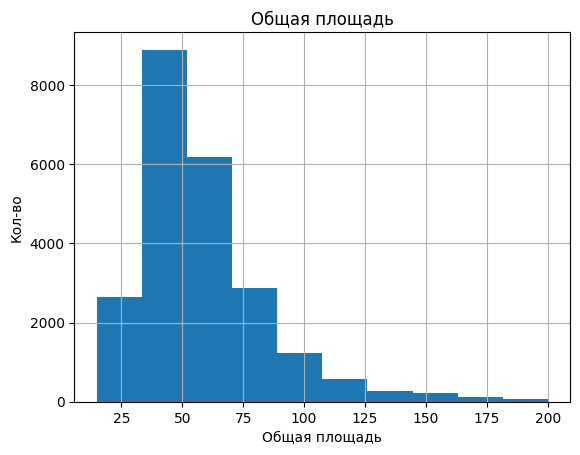

In [34]:
data['total_area'].hist(range=(15,200)) 
plt.title('Общая площадь')
plt.xlabel('Общая площадь')
plt.ylabel('Кол-во')
plt.show()

В данных 'total_area' является общей площадью, выше построили диаграмму.   
Можно сделать следующий вывод, что наибольшеее кол-во квартир на продажу в диапазоне от 30 - 50 кв.м (однокомнатные),затем в диапазоне выше 50 - 75 кв.м двухкомнатные. И в целом это похоже на правду и соответствует действительности.  
При этом можно наблюдать, что есть недвижимость больше 150 кв.м и такое действительно может встречаться и кол-ва являются минимальными. Следом построим descibe чтобы изучить дальше данные.

In [35]:
data['total_area'].describe()

count    23300.000000
mean        60.073732
std         34.800407
min         12.000000
25%         40.000000
50%         52.000000
75%         69.632500
max        900.000000
Name: total_area, dtype: float64

После describe  можно сделать вывод: среднее значение равняется 60 кв.м, мода составляет 40 кв.м, стандартное отклонение отличаются от среднего на 37 кв.м. 
Но есть площадь в 900 кв.м посмотрим ниже что эта за данные и не являются ли анамолией.

In [36]:
max_total_area =  data.loc[data['total_area'].idxmax()]
max_total_area 

total_images                              8
last_price                      420000000.0
total_area                            900.0
first_day_exposition    2017-12-06 00:00:00
rooms                                    12
ceiling_height                          2.8
floors_total                           25.0
living_area                           409.7
floor                                    25
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                          112.0
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    30706.0
cityCenters_nearest                       7
parks_around3000                        0.0
parks_nearest                           0.0
ponds_around3000                        2.0
ponds_nearest                         318.0
days_exposition                       106.0
price_for_sq_metre              

Посмотрели данные, получается это недвижимость из 12 комнат, общей площадью 900 кв.м, но при этом жилой только 409 кв.м.
Так же квартира находится на последнем этаже из 25 этажей.  
Думаю это пентхаус с доступом на крышу в связи с этим поставили такую большую площадь, пока оставим эти данные.

**4.2.Жилая площадь**

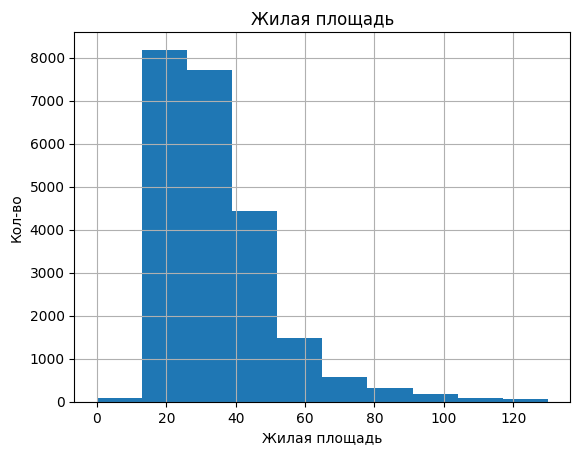

In [37]:
data['living_area'].hist(range=(0,130)) 
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во')
plt.show()

Исходя из жилой площади, можно сделать вывод что от примерно от 15 - 40 кв.м самая распространенная жилая площадь.  
Но также минимально встречаются жилые площади от 100 кв м

In [38]:
data['living_area'].describe()

count    23300.000000
mean        34.712510
std         21.977375
min          7.422736
25%         19.000000
50%         30.000000
75%         42.252495
max        409.700000
Name: living_area, dtype: float64

После describe  можно сделать вывод:   
Среднее значение равняется 36 кв.м, мода составляет 31 кв.м, стандартное отклонение отличаются от среднего на 24 кв.м.
Максимальная жилая площадь составлет 592 кв.м из случая выше, мы уже встречались с общей площадью больше 900 кв.м и думаю этот максимум относится к пентхаусу либо же дому, минимальное значение в 8 кв.м 

**4.3.Площадь кухни**

In [39]:
data['kitchen_area'].isnull().sum()

0

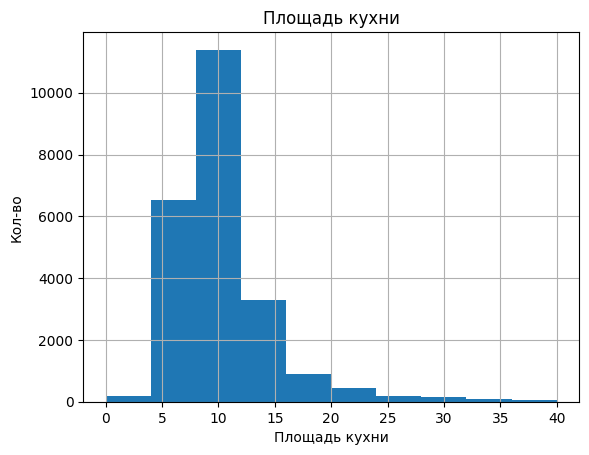

In [40]:
data['kitchen_area'].hist(range=(0,40))
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Кол-во')
plt.show()

Составили гистограму по площади кухни в диапазоне, с 0(квартиры студии) до 40 кв м. В  целом видим что в большинстве случаев кухни от 8 кв м до 12 кв м и в целом это соответсвует действительности. Начиная с 10 кв.м значительно снижаются площади кухонь. 

In [41]:
data['kitchen_area'].describe()

count    23300.000000
mean        10.181691
std          5.278129
min          0.000000
25%          7.200000
50%          9.010000
75%         11.200000
max        112.000000
Name: kitchen_area, dtype: float64

В части работы с пропусками уже заменили пустые значения на 0 в случае если это была студия, так же для остальных пустых значений внесли медиану.
Соответственно это нормально что в минимальном значении у нас есть нули.   
Среднее значение площади кухни составляет 10 кв м, стандартное отклонение 5 кв м.
Максимальная площадь кухни составляет 112 кв.м  в целом логично т.к у нас есть недвижимость в которых жилая площадь около 500 кв.м.

**4.4.Цена объекта**

Начнем цену смотреть не с гистограммы, а сначало методом describe

In [42]:
data['last_price'].describe()

count    2.330000e+04
mean     6.441874e+06
std      1.063883e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.721250e+06
max      7.630000e+08
Name: last_price, dtype: float64

Ввидим, что сложно читаемо описание, необходимо перевести цены в миллионы разделив на 1 000 000

In [43]:
data['last_price'] =  data['last_price'] / 1000000
data['last_price'].describe()

count    23300.000000
mean         6.441874
std         10.638826
min          0.430000
25%          3.400000
50%          4.600000
75%          6.721250
max        763.000000
Name: last_price, dtype: float64

Создав describe,  средняя цена составляет 6,4 млн рублей, тогда как максимальная 763 млн рублей, минимальная же 430 тыс рубля.  
Стандратное отклнение составляет 10,8 млн рублей.  

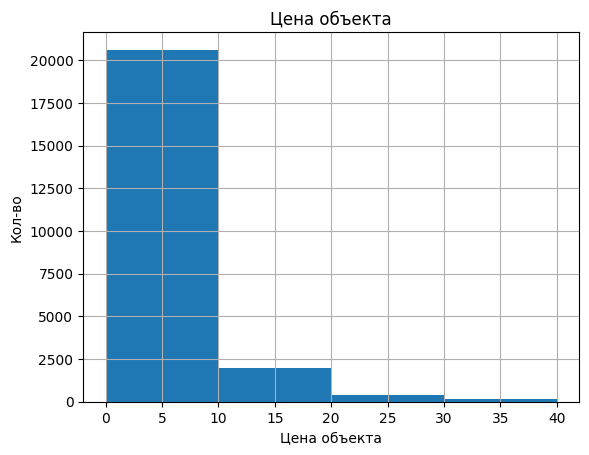

In [44]:
data['last_price'].hist(bins = 4, range=(0,40))
plt.title('Цена объекта')
plt.xlabel('Цена объекта')
plt.ylabel('Кол-во')
plt.show()

Из гисторгаммы видим что в основном все цены от диапазона 0,4 (min значение) до 10 млн рублей за недвижимость, как мы помним среднее значение продоваемой недвижимость 60 кв м и в целом тогда данные смотрятся адекватно.
Но для роверки проверим самую большую стоимость недвижимости

In [45]:
max_last_price = data.loc[data['last_price'].idxmax()]
max_last_price

total_images                             19
last_price                            763.0
total_area                            400.0
first_day_exposition    2017-09-30 00:00:00
rooms                                     7
ceiling_height                         2.65
floors_total                           10.0
living_area                           250.0
floor                                    10
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                           9.01
balcony                                 2.0
locality_name               Санкт-Петербург
airports_nearest                    25108.0
cityCenters_nearest                       3
parks_around3000                        1.0
parks_nearest                         530.0
ponds_around3000                        3.0
ponds_nearest                         756.0
days_exposition                        33.0
price_for_sq_metre              

По максимально стоимость квартиры, сразу бросается что кухня составляет 9 кв м и это заполненная медиана, при этом множество параметров не заполнены такие как апаратменты, студия, свободная планировка. Данная недвижимость находится на последнем этаже скорее всего это пентхаус в городе Санкт-Петербург. Пока оставим эти данные.

**4.5.Количество комнат**

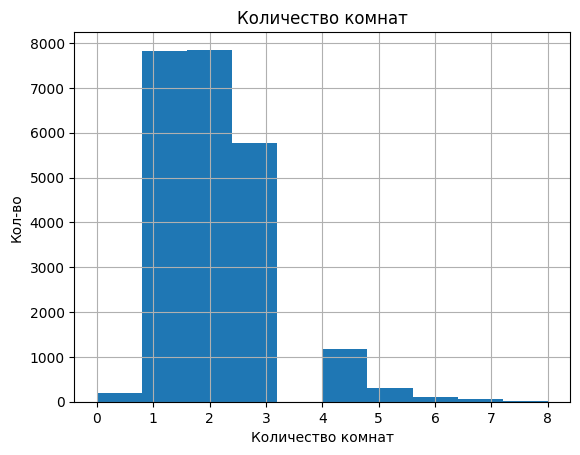

In [46]:
data['rooms']. hist(range= (0,8))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Кол-во')
plt.show()

In [47]:
data['rooms'].describe()

count    23300.000000
mean         2.076781
std          1.076571
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

По комнатам сделав гистаграму и вывели главные показатели, среднее значение равно 2,07 комнаты, стандартное отклонение в 1 комнату, максимально  19 комнат, медиана равна 2 комнатам.

**4.6.Высота потолков**

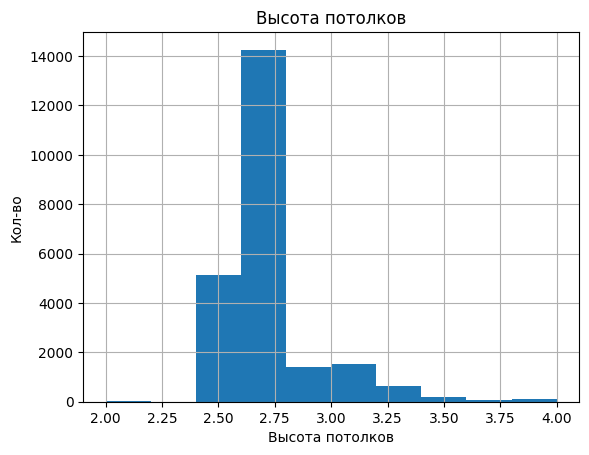

In [48]:
data['ceiling_height'].hist(range = (2, 4))
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Кол-во')
plt.show()

In [49]:
data['ceiling_height'].describe()

count    23300.000000
mean         2.692226
std          0.204850
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Исходя из данных и гистограммы можно сделать вывод, максимальное значение потолков  4 метра, минимальная высота составляет 1 метр, среднее значение 2,7 метра.

**4.7.Тип этажа квартиры («первый», «последний», «другой»)**

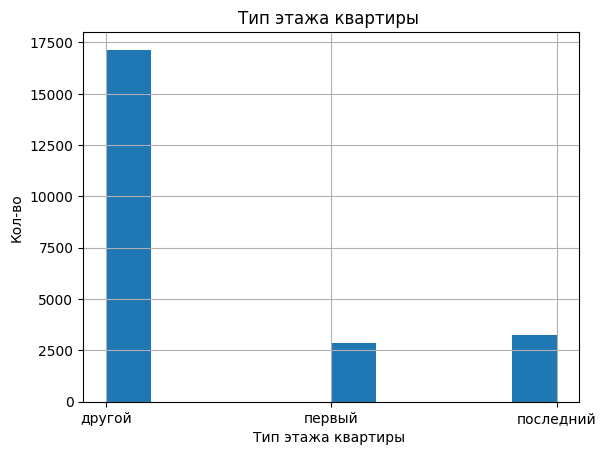

In [50]:
data['floor_category'].hist()
plt.title('Тип этажа квартиры ')
plt.xlabel('Тип этажа квартиры ')
plt.ylabel('Кол-во')
plt.show()

In [51]:
data['floor_category'].value_counts()

другой       17148
последний     3273
первый        2879
Name: floor_category, dtype: int64

Исходя из типа этажа максимальное количество объявлений под типом "другой" - 17 148, затем "последний" - 3 273  и первый этаж  2879 объявлений.

**4.8.Общее количество этажей в доме**

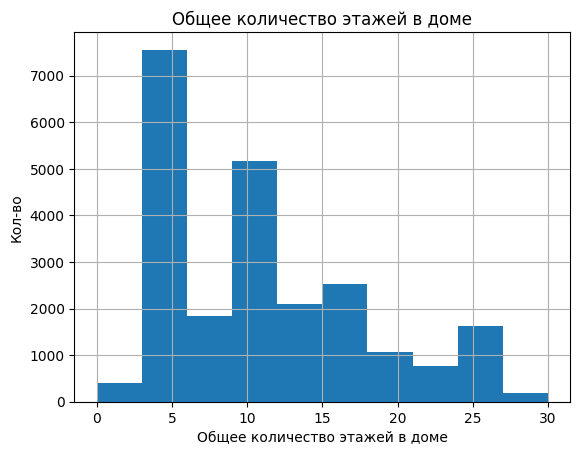

In [52]:
data['floors_total'].hist(range = (0,30))
plt.title('Общее количество этажей в доме')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Кол-во')
plt.show()

In [53]:
data['floors_total'].describe()

count    23300.000000
mean        10.636266
std          6.554680
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

Как видим из гистограммы и общими данными в основом общее количество этажей в диапазоне 5 этажей, при этом среднее значение составляет 10 этажей, минимальное 1 этаж. Максимальное значение составляет 36 этажей.

**4.9.Расстояние до центра города в метрах**

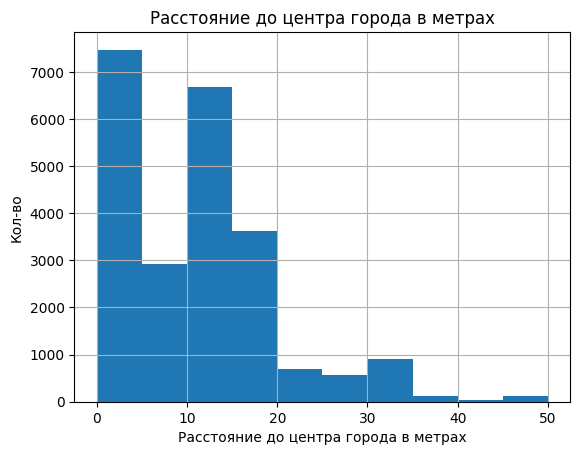

In [54]:
data['cityCenters_nearest'].hist(range = (0,50))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Кол-во')
plt.show()

In [55]:
data['cityCenters_nearest'].describe()

count    23300.000000
mean        10.513777
std          9.519894
min          0.000000
25%          2.000000
50%         11.000000
75%         15.000000
max         65.000000
Name: cityCenters_nearest, dtype: float64

Изначально были пропуски, заменили пустые значения на 0 т.к в данных есть села, поселки и деревни в которых отсутсвтует как таковой центр. Можно сделать вывод, что в большинстве случаев продажа недвижимости в основном была почти в центре, но не стоит забывать что в эти значения попдают еще места где нет так такового центра, среднее значение до центра города  10 метров, а максимальное 65 метров.

**4.10.Расстояние до ближайшего парка**

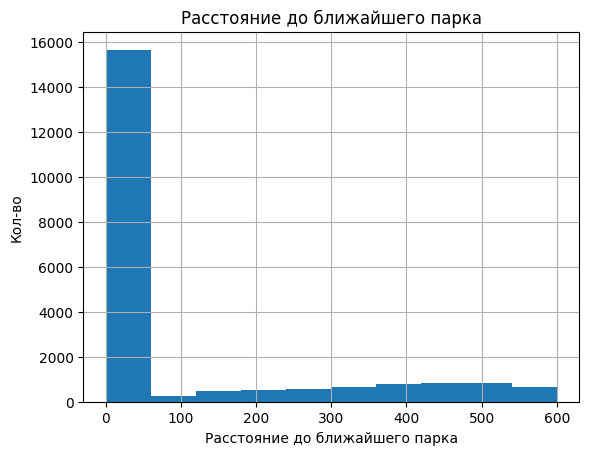

In [56]:
data['parks_nearest'].hist( range = (0,600))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Кол-во')
plt.show()

In [57]:
data['parks_nearest'].describe()

count    23300.000000
mean       166.051888
std        304.216463
min          0.000000
25%          0.000000
50%          0.000000
75%        300.000000
max       3190.000000
Name: parks_nearest, dtype: float64

В данных по расстоянию до ближайшего парка мы видим что в основом значения на нуле и это говорит о том что парков рядом нет в случае городов и в случае сел, поселков просто их отсутствие. При этом среднее значение составляет 166 метров до парка, максимальное 3 км

**4.11.Как быстро продавались квартиры**

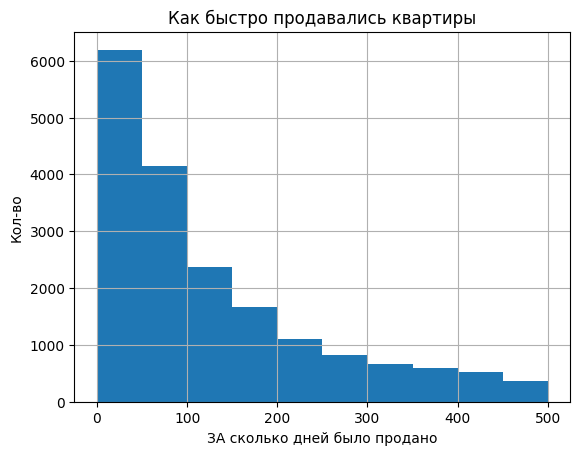

In [58]:
data['days_exposition'].hist(range=(0,500))
plt.title('Как быстро продавались квартиры')
plt.xlabel('ЗА сколько дней было продано')
plt.ylabel('Кол-во')
plt.show()

In [59]:
data['days_exposition'].describe()

count    20168.000000
mean       180.678302
std        219.773737
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [60]:
#первели дни в месяцы
month_exposition = data['days_exposition']/30
month_exposition.describe()

count    20168.000000
mean         6.022610
std          7.325791
min          0.033333
25%          1.500000
50%          3.166667
75%          7.700000
max         52.666667
Name: days_exposition, dtype: float64

Перевели дни в месяцы для лучшего понимания, можно сделать вывод что в среднем каждое объявление было размещено по 6 месяцов (180 дней) при этом самое максимальное 52 месяца , а это 4 года и 3 месяца. Самая быстрая продажа завершалась за  1 день. Быстрые продажи завершаются за 45 дней (1,5 месяца) долгие же 231 дня (7,7 месяцев)

**4.12.Факторы больше всего влияющие на общую (полную) стоимость объекта**

Рассмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта.  
Проверим, зависит ли цена от:  
общей площади;  
жилой площади;   
площади кухни;  
количества комнат;  
этажа, на котором расположена квартира (первый, последний, другой);  
даты размещения (день недели, месяц, год).  
Для начала построим графики, использовать будем следующие типы графиков:  
*Scatter plot (диаграмма рассеяния):*  
*Box plot (ящик с усами):*  

*Scatter plot (диаграмма рассеяния):*  
Общая площадь vs. Цена  
Жилая площадь vs. Цена  
Площадь кухни vs. Цена  
Количество комнат vs. Цена  

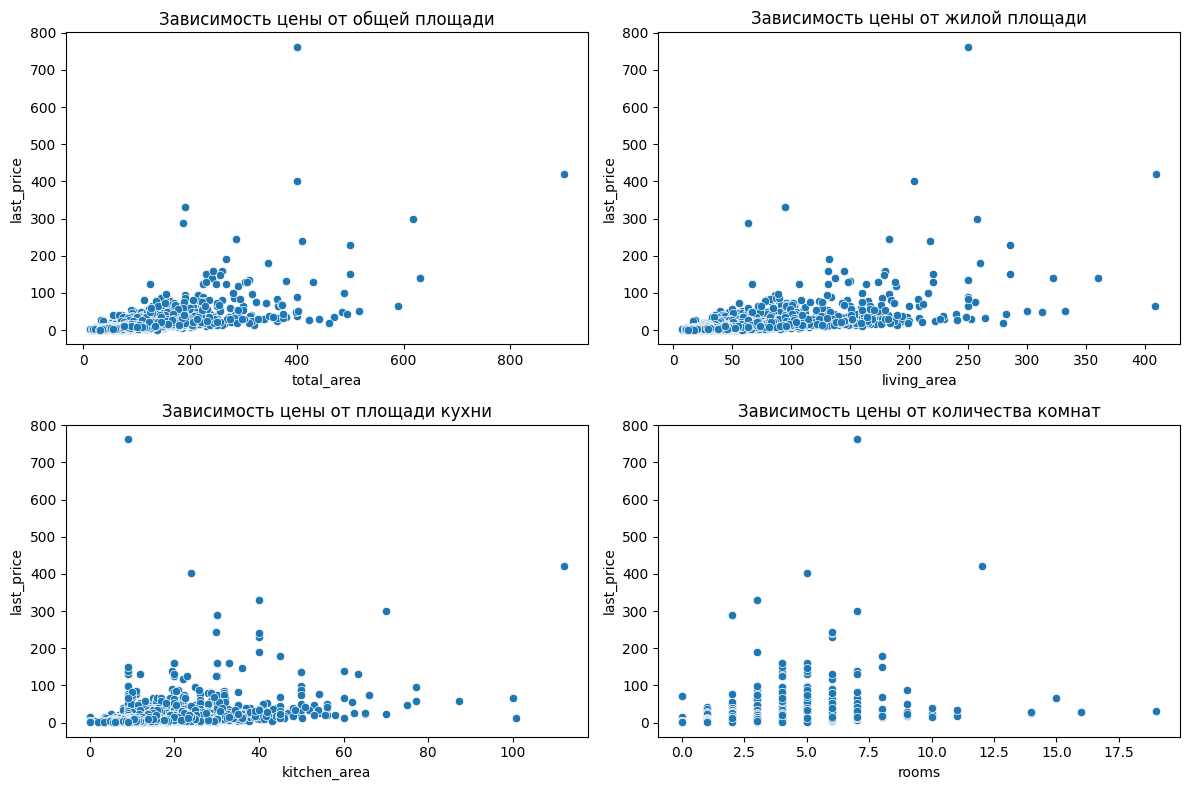

In [61]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='total_area', y='last_price', data=data)
plt.title('Зависимость цены от общей площади')

plt.subplot(2, 2, 2)
sns.scatterplot(x='living_area', y='last_price', data=data)
plt.title('Зависимость цены от жилой площади')

plt.subplot(2, 2, 3)
sns.scatterplot(x='kitchen_area', y='last_price', data=data)
plt.title('Зависимость цены от площади кухни')

plt.subplot(2, 2, 4)
sns.scatterplot(x='rooms', y='last_price', data=data)
plt.title('Зависимость цены от количества комнат')

plt.tight_layout()
plt.show()

Можем наблюдать что три графика где сравнивается цена с площадю в целом очень похожи между собой и это логично. Выбивается график касательно комнат.   
Как мы помним среднее квадратура продаж недвижимости  около 60 кв м на графике это видно максимальное скопление точек, так же присуствуют аномальные вбросы, на мой взгляд они имеют место быть и как раз интересно, что например есть квартиры в  200 кв м со стоимостью больше  300 млн рублей. Так же логично чем больше комнат тем более растет цена. Посторим линейчатую диаграмму по кол-вам комнат и средней цене за кадратный метр.

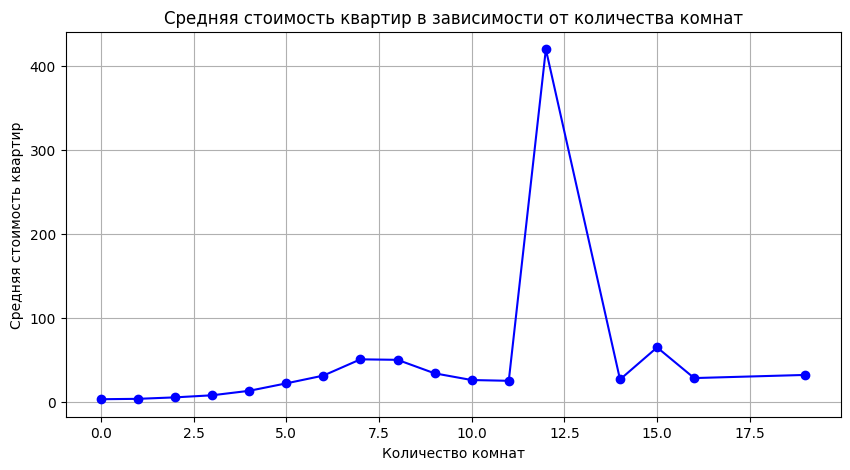

In [62]:
pivot_table_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='mean') #создаем сводную таблицу

plt.figure(figsize=(10, 5))
plt.plot(pivot_table_rooms.index, pivot_table_rooms['last_price'], marker='o', linestyle='-', color='b')
plt.title('Средняя стоимость квартир в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя стоимость квартир')
plt.grid(True)
plt.show()

На графике прекрасно видно, что средняя стоимость квартир растет от количества комнат, при этом так же здесь пояляется квартира самая дорогая квартира из Санкт-Петербурга. Однозначно можно сказать что от кол-ва комнат растёт цена квартиры
 
 Решено дополнительно построить матрицу корреляции.

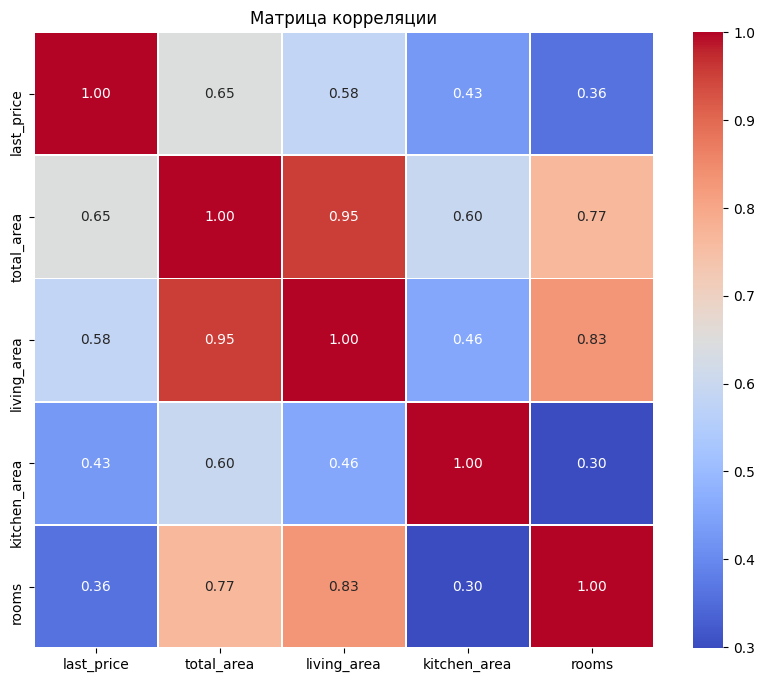

In [63]:
columns_of_interest = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']

subset = data[columns_of_interest] #Создаем подвыборку данных

correlation_matrix = subset.corr() #Строим матрицу корреляции

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Матрица корреляции')
plt.show()

Видя карту вием что наибольшая корреляция цены с собщей площадью квартиры составляет  коэф-т 0,65. Затем идет уже жилая площадь с 0,56,  а вот кухня имеет коэф-т 0,43. Ну и наменьше влияние на цены от кол-в комнат.  

*Анализ категориальных параметров*  
Теперь расссмортим есть ли связь с этажностью, датой и месяцами с ценой на недвижимость. Сначала попробуем ящик с усами

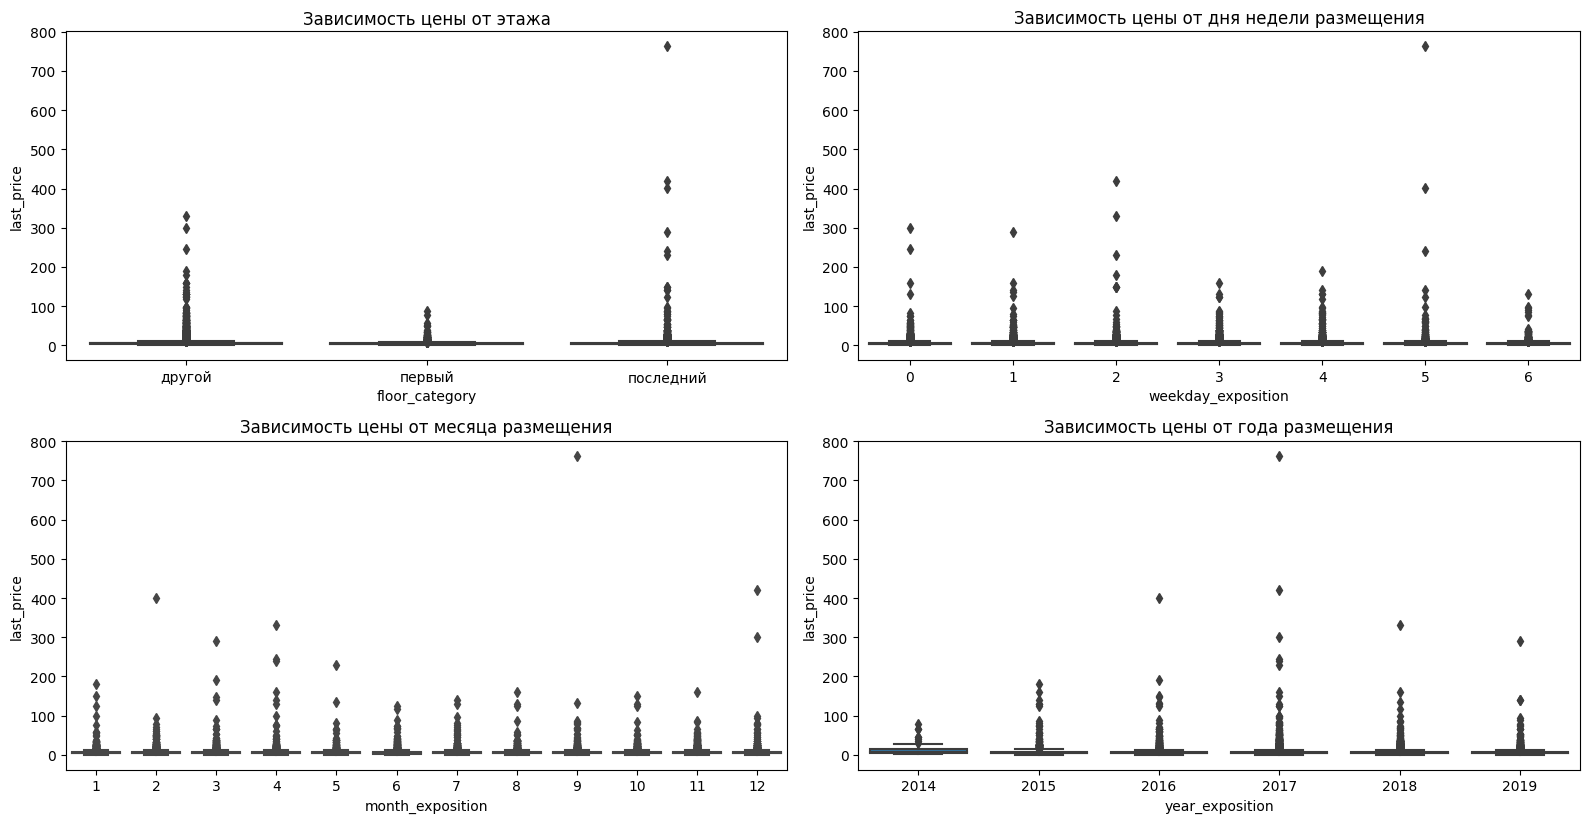

In [64]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.boxplot(x='floor_category', y='last_price', data=data)
plt.title('Зависимость цены от этажа')

plt.subplot(3, 2, 2)
sns.boxplot(x='weekday_exposition', y='last_price', data=data)
plt.title('Зависимость цены от дня недели размещения')

plt.subplot(3, 2, 3)
sns.boxplot(x='month_exposition', y='last_price', data=data)
plt.title('Зависимость цены от месяца размещения')

plt.subplot(3, 2, 4)
sns.boxplot(x='year_exposition', y='last_price', data=data)
plt.title('Зависимость цены от года размещения')

plt.tight_layout()
plt.show()

На мой взгляд ящик с усами очень плохо информативен чтобы сказать коротко про влияние цены и праметров.
Для категориальных параметров посчитаем сводные таблицы, в качестве индекса - категориальный параметр, а в качестве значений посчитаем среднюю стоимость квартир в каждой категории. По сводной таблице построим столбчатые диаграммы.

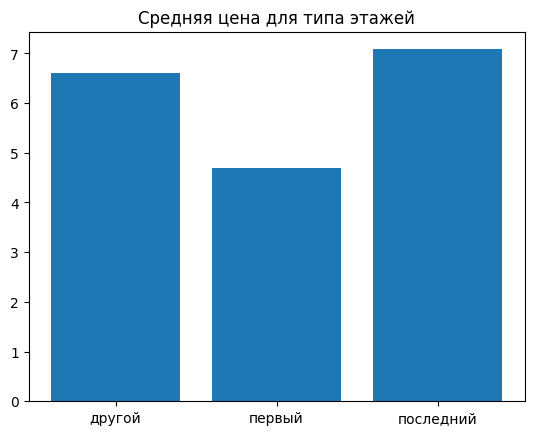

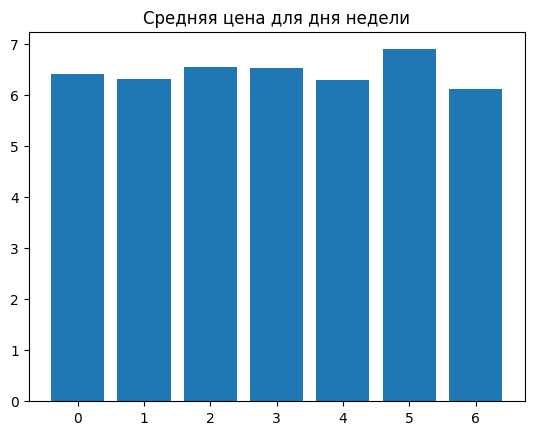

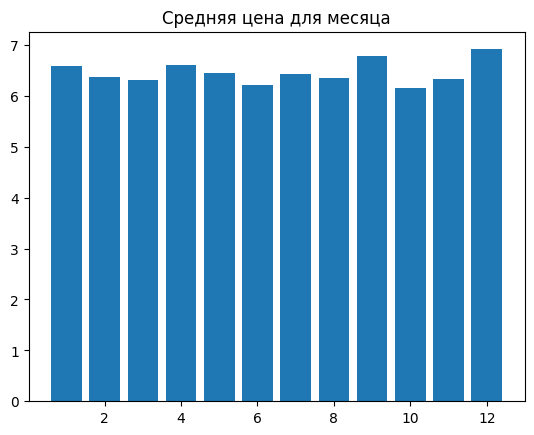

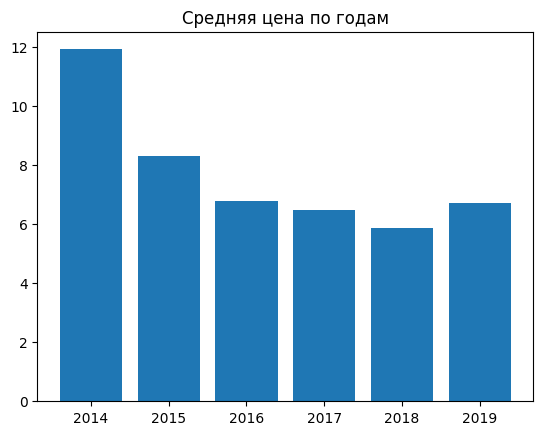

In [65]:
# Диаграмма для floor_category
pivot_floor = data.pivot_table(index='floor_category', values='last_price', aggfunc='mean')
plt.bar(pivot_floor.index, pivot_floor['last_price'])
plt.title('Средняя цена для типа этажей')
plt.show()

# Диаграмма для weekday_exposition
pivot_weekday = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean')
plt.bar(pivot_weekday.index, pivot_weekday['last_price'])
plt.title('Средняя цена для дня недели')
plt.show()

# Диаграмма для month_exposition
pivot_month = data.pivot_table(index='month_exposition', values='last_price', aggfunc='mean')
plt.bar(pivot_month.index, pivot_month['last_price'])
plt.title('Средняя цена для месяца')
plt.show()

# Диаграмма для year_exposition
pivot_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc='mean')
plt.bar(pivot_year.index, pivot_year['last_price'])
plt.title('Средняя цена по годам')
plt.show()


Посмотрев на категориальные данные, а именно: тип этажа, день недели, месяц и год можно сделать следующие выводы.  
Средняя цена квартир зависит от типа этажа, на последнем этаже квартиры стоят дороже (открывается лучше вид или это пентхаусы), при этом цена снижается если квартира находится на первом этаже, а квартиры на другом этаже стоят чуть дешевле чем на последнем.  
В целом средняя цена не сильно зависит от дня недели публикации,единственное выделяется только пятница в которой средняя цена за квадратный метр достигала 7 млн рублей.  

Средняя цена за квадратный метр так же не сильно зависим от месяца публикаций  в целом  цены незначительно выше только в декабре сентябре и марте, кстати интересно наблюдение что это конец квартала.   

Касательное же средней цены за квадртаный метр, то в данном случае самые "дорогие" квардртаные метры были в  2014 году, затем шло снидение и только в  2019 году цена за квадратный метр стала больше 2016 года  и 2017 года, выйдя на уровень 2016 года, при этом не достигнув отметки за 2015 год.


**4.13. Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [66]:
locality_name_top10 = data['locality_name'].value_counts().head(10)

data_top10_localities = data[data['locality_name'].isin(locality_name_top10.index)]

pivot_table_localities = data_top10_localities.pivot_table(index='locality_name', values=['price_for_sq_metre'], aggfunc={'price_for_sq_metre': ['count', 'mean']})

pivot_table_localities.columns = ['number_of_ads', 'mean_price_per_sq_meter']

pivot_table_localities = pivot_table_localities.sort_values(by='mean_price_per_sq_meter', ascending=False)

print(pivot_table_localities)

highest_price_locality = pivot_table_localities['mean_price_per_sq_meter'].idxmax()
lowest_price_locality = pivot_table_localities['mean_price_per_sq_meter'].idxmin()

print(f"Населённый пункт с самой высокой стоимостью квадратного метра: {highest_price_locality}")
print(f"Населённый пункт с самой низкой стоимостью квадратного метра: {lowest_price_locality}")


                   number_of_ads  mean_price_per_sq_meter
locality_name                                            
Санкт-Петербург            15421            114087.929927
Пушкин                       362            103218.299834
Кудрово                      457             95359.825667
поселок Парголово            316             90020.636772
Мурино                       579             85917.615475
поселок Шушары               433             78482.016189
Колпино                      336             75526.880506
Гатчина                      304             68865.125428
Всеволожск                   394             68542.305406
Выборг                       235             58163.517234
Населённый пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург
Населённый пункт с самой низкой стоимостью квадратного метра: Выборг


Получили решение что самая дорогая средняя цена за квадратный метр в Санкт-Петербург, а самая дешевая в Выборге. При этом так же в Питере в среднем в 2,6 раз больше объявленей чем в каком-либо населенном пункте аж 15 421 штука.

**4.14. Средняя стоимость квартир на разном удалении от центра в Санкт-Петербурге**

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга

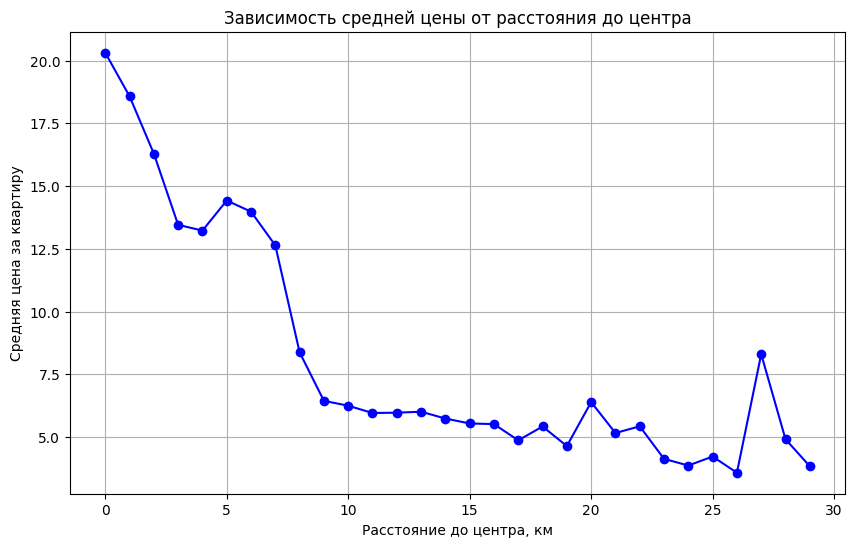

In [67]:
spb_data = data[data['locality_name'] == 'Санкт-Петербург'] #только квартиры в Санкт-Петербурге

# Строим сводную таблицу
pivot_table_distance = spb_data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(pivot_table_distance.index, pivot_table_distance['last_price'], marker='o', linestyle='-', color='b')
plt.title('Зависимость средней цены от расстояния до центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за квартиру')
plt.grid(True)
plt.show()

Построив график, мы видим что в Санкт-Петербурге в центре города средняя цена за квартиру составляет около 20 тыс рублей за квадратный метр и это является самой высокой ценой. После этого чем дальше от центра города тем дешевле стоит квадрыный метр за квартиру, что так же является логичным.  
Но есть выброс на уроне 5 км и 27 км от центра квадратный метр стоит дороже возможно там находится важный объект либо даже парк или река в связи с чем цена поднимается

### Общий вывод

Изначально в датафрейме было 23 699 строк, в конечном результате осталось 23 330 было удалено около 1,5% данных.

Ниже представлены некоторые ключевые выводы:  
1. **Жилая площадь и аномалии:** Были обнаружены аномалии в данных, такие как нулевая жилая площадь, которые могли быть вызваны человеческим фактором. Проведена фильтрация этих аномалий, а  так же проведено восстановление пропусков путем среднего коэф-та отношения жилой площади к общей площади.  
Исходя из жилой площади, можно сделать вывод что от 15 - 40 кв.м самая распространенная жилая площадь. Но также минимально встречаются жилые площади от 100 кв м. Среднее значение равняется 36 кв.м, мода составляет 31 кв.м, стандартное отклонение отличаются от среднего на 24 кв.м. Максимальная жилая площадь составлет 592 кв.м, эта квартира находится в Санкт-Петербурге с общей площадью больше 900 кв.м и думаю этот максимум относится к пентхаусу либо же дому, минимальное значение жилой площади составляет 8 кв.м.    
2. **Анализ общей площади:** Построены графики и проведен анализ общей площади. Выявлено, что наибольшее количество квартир на продажу имеют площадь от 30 до 50 кв.м. Этот вывод соответствует ожиданиям.Затем в диапазоне выше 50 - 75 кв.м двухкомнатные. И
При этом можно наблюдать, что есть недвижимость больше 150 кв.м и такое действительно может встречаться и кол-ва являются минимальными..
3. **Цена недвижимости:** Средняя цена составляет 6,4 млн рублей, тогда как максимальная 763 млн рублей, минимальная же 430 тыс рубля. Стандратное отклнение составляет 10,8 млн рублей. В основном все цены от диапазона 0,4 (min значение) до 10 млн рублей за недвижимость, как мы помним среднее значение продаваемой недвижимость 60 кв м и в целом тогда данные смотрятся адекватно. 
4. **Факторы, влияющие на цену:** Изучены факторы, влияющие на цену, такие как общая площадь, этаж, удаленность от центра. Определено, что общая площадь имеет наибольшее влияние на цену, так же как и количество комнат. Так же чем блиде квартира к центру, то дороже, за исключением если квартира находится возле важных объектов. Так же влияет на стоимость квартиры тип этажа. На последнем этаже квартиры стоят дороже (открывается лучше вид или это пентхаусы), при этом цена снижается если квартира находится на первом этаже, а квартиры на другом этаже стоят чуть дешевле чем на последнем.  
5. **Расстояние до центра:** Построен график зависимости средней цены от расстояния до центра Санкт-Петербурга.Можно сделать вывод что в Санкт-Петербурге в центре города средняя цена за квартиру составляет около 20 тыс рублей за квадратный метр и это является самой высокой ценой. После этого чем дальше от центра города тем дешевле стоит квадратный метр за квартиру, что так же является логичным. Но есть выброс на уроне 5 км от центра квадратный метр стоит дороже возможно там находится важный объект либо даже парк или река в связи с чем цена поднимается  
6. **Сравнение населенных пунктов:** Санкт-Петербург оказался самым дорогим 114 084 рублей за квадратный метром и при этом самое большое кол-во объявлений в размере 15 421, после идет Пушкин со средннй стоимостью 103 218 рублей за квадратный метр, а Выборг -оказался самым дешевым средня цена за квадратный метр составила 58 163 рублей.  
7. **Время продажи недвижимости:** Можно сделать вывод что в среднем каждое объявление было размещено по 6 месяцов (180 дней) при этом самое максимальное 52 месяца , а это 4 года и 3 месяца. Самая быстрая продажа завершалась за 1 день. Быстрые продажи завершаются за 45 дней (1,5 месяца) долгие же 231 дня (7,7 месяцев) 
8. **Зависимость от дня и месяца размещения:** В целом средняя цена не сильно зависит от дня недели публикации,единственное выделяется только пятница в которой средняя цена за квадратный метр достигала 7 млн рублей.  Средняя цена за квадратный метр так же не сильно зависим от месяца публикаций  в целом  цены незначительно выше только в декабре сентябре и марте, кстати интересно наблюдение что это конец квартала.  Касательное же средней цены за квадртаный метр, то в данном случае самые "дорогие" квардртаные метры были в  2014 году, затем шло снидение и только в  2019 году цена за квадратный метр стала больше 2016 года  и 2017 года, выйдя на уровень 2016 года, при этом не достигнув отметки за 2015 год.  
